In [141]:
#Image Data Link:
#https://github.com/codebasics/py/tree/master/DataScience/CelebrityFaceRecognition/model

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
img = cv2.imread('./Project/6_image_classification/test_images/leomessi1.jpeg')
img.shape

(1200, 960, 3)

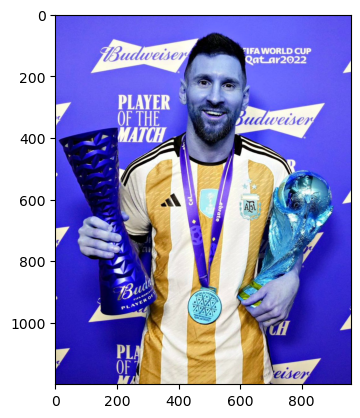

In [3]:
#Here we have (x height,y height,rgb channels)
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 960)

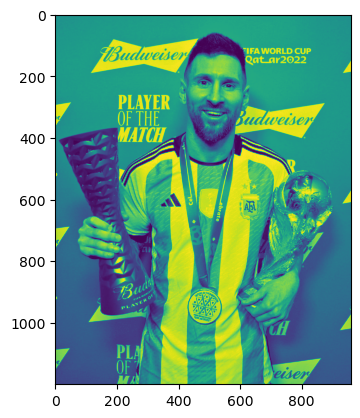

In [5]:
#here rgb channel is missing for gray scale image
plt.imshow(gray)

In [6]:
img

array([[[ 98,  86, 240],
        [ 96,  84, 238],
        [ 94,  82, 236],
        ...,
        [ 91,  79, 239],
        [ 89,  77, 237],
        [ 87,  75, 235]],

       [[ 97,  85, 239],
        [ 96,  84, 238],
        [ 95,  83, 237],
        ...,
        [ 91,  79, 239],
        [ 89,  77, 237],
        [ 88,  76, 236]],

       [[ 95,  83, 237],
        [ 95,  83, 237],
        [ 95,  83, 237],
        ...,
        [ 91,  79, 239],
        [ 89,  77, 237],
        [ 88,  76, 236]],

       ...,

       [[ 22,   7, 145],
        [ 22,   7, 145],
        [ 23,   8, 146],
        ...,
        [ 36,  22, 164],
        [ 35,  21, 163],
        [ 34,  20, 162]],

       [[ 21,   6, 144],
        [ 21,   6, 144],
        [ 22,   7, 145],
        ...,
        [ 37,  23, 165],
        [ 36,  22, 164],
        [ 35,  21, 163]],

       [[ 20,   5, 143],
        [ 21,   6, 144],
        [ 22,   7, 145],
        ...,
        [ 37,  23, 165],
        [ 37,  23, 165],
        [ 36,  22, 164]]

In [7]:
gray

array([[133, 131, 129, ..., 128, 126, 124],
       [132, 131, 130, ..., 128, 126, 125],
       [130, 130, 130, ..., 128, 126, 125],
       ...,
       [ 50,  50,  51, ...,  66,  65,  64],
       [ 49,  49,  50, ...,  67,  66,  65],
       [ 48,  49,  50, ...,  67,  67,  66]], dtype=uint8)

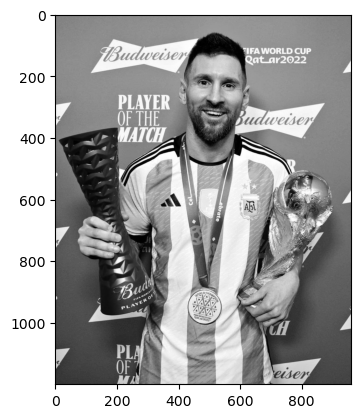

In [8]:
#plotting gray image using matplotlib

plt.imshow(gray,cmap='gray')

In [9]:
#importing harr cascade from our folder

face_cascade = cv2.CascadeClassifier('./Project/6_image_classification/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./Project/6_image_classification/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[403, 130, 242, 242]], dtype=int32)

In [10]:
#403, 130, 242, 242 these are the coordinate of face i.e. (x,y,x+w,y+h)

(x,y,w,h) = faces[0]
x,y,w,h

(403, 130, 242, 242)

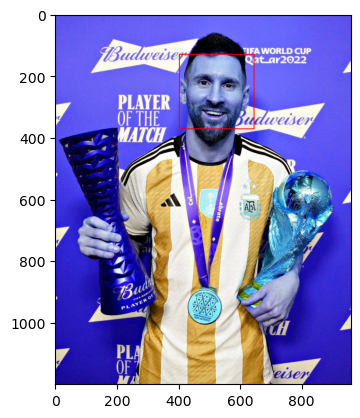

In [11]:
#marking the face

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

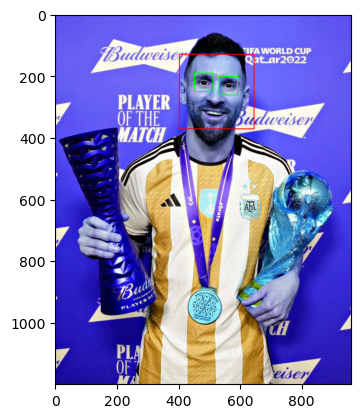

In [12]:
'''
For our image classification project we will first detect the face and two eyes. If two eyes are visible then we 
will use the image for training and testing. If not then the image is discarded. Here 80% data preprocessing is done
through opencv and the rest 20% manually.
'''

#Now for eye detection

cv2.destroyAllWindows()

for (x,y,w,h) in faces:#<--- we will loop through all the faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#<--- for each face we will draw face border
    roi_gray = gray[y:y+h,x:x+h]#<--- range of coordinates
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)#<--- then we apply eye cascade which will give eyes location
    for (ex,ey,ew,eh) in eyes:#<--- then drawing borders in each eye
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

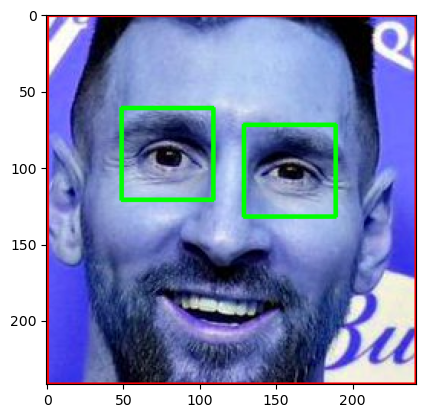

In [13]:
'''
This is the part of image we are interested in, as we will crop this image and store the image in different folder
and we will use that for our model training.
'''
plt.imshow(roi_color,cmap='gray')

In [14]:
#creating a function that takes in a image and returns proper cropped face if it detects face with two eyes

def get_cropped_image_if_2_eyes(image_path):#<--- we supplied image path
    img = cv2.imread(image_path)#<--- read the image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#<--- convert image to gray
    faces = face_cascade.detectMultiScale(gray,1.3,5)#<--- detect faces
    for (x,y,w,h) in faces:#<--- loop through all the faces
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:#<--- if number of eyes if >=2 then it returns region of interest
            return roi_color
    
'''
Note that def get_cropped_image_if_2_eyes(image_path) function will only return first face if we have two face in 
single image. If you want to make above function more robust then return two faces (roi_color) as an array and save 
those two images.
'''    

'\nNote that def get_cropped_image_if_2_eyes(image_path) function will only return first face if we have two face in \nsingle image. If you want to make above function more robust then return two faces (roi_color) as an array and save \nthose two images.\n'

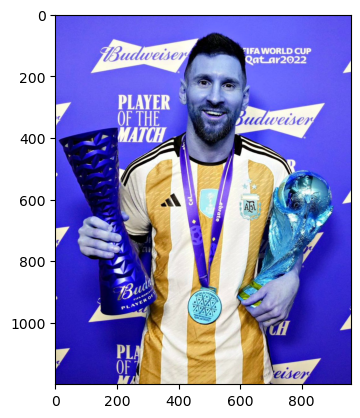

In [15]:
#sample image for test 1
img = cv2.imread('./Project/6_image_classification/test_images/leomessi1.jpeg')
plt.imshow(img)

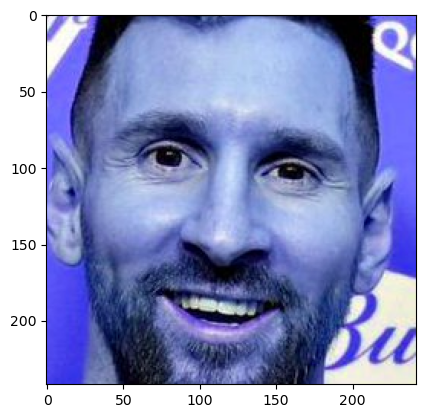

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./Project/6_image_classification/test_images/leomessi1.jpeg')
plt.imshow(cropped_image)

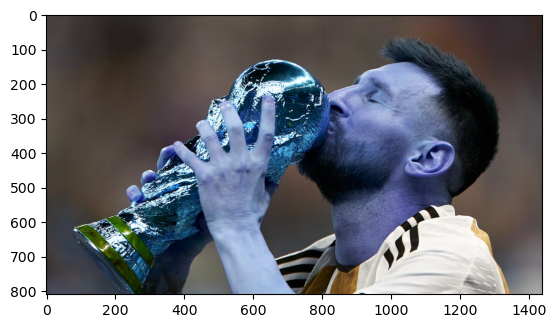

In [17]:
#Now if the face is not clearly visible we want this function to return nothing and reject the image

#sample image for test 2
img = cv2.imread('./Project/6_image_classification/test_images/leomessi2.jpg')
plt.imshow(img)

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./Project/6_image_classification/test_images/leomessi2.jpg')
#plt.imshow(cropped_image)
print(cropped_image)

None


In [19]:
path_to_data = './Project/6_image_classification/dataset/' #<--- './' is current location
path_to_cr_data = './Project/6_image_classification/dataset/cropped/' #<--- path of cropped image

In [20]:
'''
Our dataset directory/folder has following sub-directories/sub-folders 

lionel_messi
maria_sharapova
serena_williams
virat_kohli
'''

import os 
img_dirs = [] #<--- list of image directory
for entry in os.scandir(path_to_data): #<--- loops in every sub directory (loops in all folders within a folder)
    if entry.is_dir():
        img_dirs.append(entry.path)#<--- name of these directory is stored in this list

In [21]:
print(img_dirs)

['./Project/6_image_classification/dataset/roger_federer', './Project/6_image_classification/dataset/maria_sharapova', './Project/6_image_classification/dataset/virat_kohli', './Project/6_image_classification/dataset/serena_williams', './Project/6_image_classification/dataset/lionel_messi']


In [22]:
#we will make a cropped folder and if it exists then remove it (for multiple runs)

import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)    

In [23]:
'''
we will iterate through each of image directory, detect face crop them and inside cropped directory we will make
another 5 directory with clelbraty name and store their cropped images their

i.e.

loop in 

['./Project/6_image_classification/dataset/roger_federer', 
'./Project/6_image_classification/dataset/maria_sharapova', 
'./Project/6_image_classification/dataset/virat_kohli', 
'./Project/6_image_classification/dataset/serena_williams', 
'./Project/6_image_classification/dataset/lionel_messi']


then crop faces and create new directory inside './Project/6_image_classification/dataset/cropped/ and


inside that we will create './Project/6_image_classification/dataset/cropped/' and inside that directory we will create

['./Project/6_image_classification/dataset/cropped/roger_federer/', 
'./Project/6_image_classification/dataset/cropped/maria_sharapova/', 
'./Project/6_image_classification/dataset/cropped/virat_kohli/', 
'./Project/6_image_classification/dataset/cropped/serena_williams/', 
'./Project/6_image_classification/dataset/cropped/lionel_messi/']

and store their cropped images their
'''

"\nwe will iterate through each of image directory, detect face crop them and inside cropped directory we will make\nanother 5 directory with clelbraty name and store their cropped images their\n\ni.e.\n\nloop in \n\n['./Project/6_image_classification/dataset/roger_federer', \n'./Project/6_image_classification/dataset/maria_sharapova', \n'./Project/6_image_classification/dataset/virat_kohli', \n'./Project/6_image_classification/dataset/serena_williams', \n'./Project/6_image_classification/dataset/lionel_messi']\n\n\nthen crop faces and create new directory inside './Project/6_image_classification/dataset/cropped/ and\n\n\ninside that we will create './Project/6_image_classification/dataset/cropped/' and inside that directory we will create\n\n['./Project/6_image_classification/dataset/cropped/roger_federer/', \n'./Project/6_image_classification/dataset/cropped/maria_sharapova/', \n'./Project/6_image_classification/dataset/cropped/virat_kohli/', \n'./Project/6_image_classification/datas

In [24]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs: #<--- loops through directory in above list
    count = 1 #<--- useful for file name assignment
    celebrity_name = img_dir.split('/')[-1] #<--- then splits the path with '/' and on doing so we get 
    #['Project','6_image_classification','dataset','lionel_messi'] and [-1] index will give celebrity name
    
    celebrity_file_names_dict[celebrity_name]=[] #<--- creating a key for cropped directory which stores their path
    
    for entry in os.scandir(img_dir):#<--- goes through image directory in above list detect face, crop and copy to /cropped
        roi_color = get_cropped_image_if_2_eyes(entry.path) #<--- calling above function
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name #<--- creates this './Project/6_image_classification/dataset/cropped/lionel_messi/' name
            
            if not os.path.exists(cropped_folder): #<--- creates this './Project/6_image_classification/dataset/cropped/lionel_messi/' directory if not exists
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)#<--- append every celebraty name path in a list
                
            cropped_file_name = celebrity_name + str(count) + ".png" #<--- assign 'leomessi1.png', 'leomessi2.png', ... names     
            cropped_file_path = cropped_folder + "/" + cropped_file_name #<--- in cropped_file_path we will store cropped images
   
            cv2.imwrite(cropped_file_path,roi_color) #<--- saving the cropped images
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #<--- storing all cropped image file path dictionary (it will be useful later on) 
            #^--- key = name of celebrity, value = list of file path
            '''
                 { 
                    'lionel_messi':[
                                      './Project/6_image_classification/dataset/cropped/lionel_messi/messi1.png',
                                      './Project/6_image_classification/dataset/cropped/lionel_messi/messi2.png', ...
                                   ]
                                   ...
                 }
                 
            '''
            
            count = count + 1
    
'''
Note that def get_cropped_image_if_2_eyes(image_path) function will only return first face if we have two face in 
single image. If you want to make above function more robust then return two faces as an array and save those two 
images.
'''

'\nNote that def get_cropped_image_if_2_eyes(image_path) function will only return first face if we have two face in \nsingle image. If you want to make above function more robust then return two faces as an array and save those two \nimages.\n'

In [25]:
'''
Inside cropped folder what you can see is that cropped faces have faces other than respective celebrity. Even though
we have automated most of the processes some images should be removeb manually. So, go to these folder and manually 
delete photos that do not look like respective celebrity. 
'''

'\nInside cropped folder what you can see is that cropped faces have faces other than respective celebrity. Even though\nwe have automated most of the processes some images should be removeb manually. So, go to these folder and manually \ndelete photos that do not look like respective celebrity. \n'

In [106]:
#After manual cleanup of images....
#Since we deleted some images manually we should recreate dictionary with keys and values

celebrity_file_names_dict={}

for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        
    celebrity_file_names_dict[celebrity_name]=file_list
    
celebrity_file_names_dict #<--- contains all the valid files 

{'roger_federer': ['./Project/6_image_classification/dataset/cropped/roger_federer/roger_federer1.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer17.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer21.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer24.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer29.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer9.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer22.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer19.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer12.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer3.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer26.png',
  './Project/6_ima

In [107]:
#We will do wavelet transformation on these images which allows us to extract important feature from image

import pywt #<--- py watelet transform library

def w2d(img,mode='haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)#<--- Datatype conversion and conversion to grayscale
    imArray = np.float32(imArray)#<--- Conversion to float
    imArray = imArray/255
    coeffs = pywt.wavedec2(imArray,mode,level=level) #<--- compute coeffecinet after wavelet transformation
    
    coeffs_H = list(coeffs)#<--- Process Coeffecients
    coeffs_H[0] = coeffs_H[0]*0;
    
    imArray_H = pywt.waverec2(coeffs_H,mode);#<--- reconstruction
    imArray_H = imArray_H*255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H #<--- returns wavelet transformed image

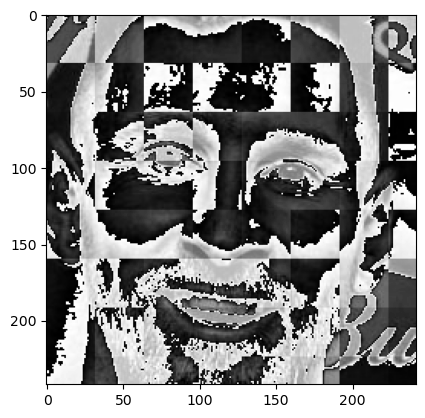

In [108]:
cropped_image = get_cropped_image_if_2_eyes('./Project/6_image_classification/test_images/leomessi1.jpeg')

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

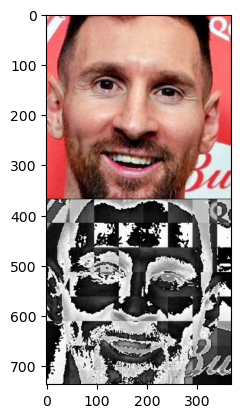

In [109]:
'''
This image is very important for computer because it shows lot of features like 
                    eye is differentiated from forhead, nose, chicks  

Now we will create wavelet transformation to all the images in crop folder.

But we will stack raw image on top of wavelet transformed image because raw image still has useful information as well
as wavelet transformed image. Raw image can give certain information to classifier as well as wavelet transformed image
'''
plt.imshow(cv2.imread('./Project/6_image_classification/test_images/leomessi3.jpg'))#<--- similar to this

In [110]:
#we will do this to all images in cropped folder

celebrity_file_names_dict #this is very important dictionary consisting cropped image lication where key = celebrity_name, values = list of path

{'roger_federer': ['./Project/6_image_classification/dataset/cropped/roger_federer/roger_federer1.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer17.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer21.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer24.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer29.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer9.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer22.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer19.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer12.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer3.png',
  './Project/6_image_classification/dataset/cropped/roger_federer/roger_federer26.png',
  './Project/6_ima

In [111]:
#iterating through dictionary 

X = []#<--- independent variable = celebrity images
y = []#<--- dependent variable which our model will predict = celebrity names
#^--- inside y we cant just add name their should be a number so assigning them a random number

class_dict = {}
count = 0

for celebrity_names in celebrity_file_names_dict.keys():
    class_dict[celebrity_names] = count
    count = count + 1

class_dict    

{'roger_federer': 0,
 'maria_sharapova': 1,
 'virat_kohli': 2,
 'serena_williams': 3,
 'lionel_messi': 4}

In [112]:
#iterating through dictionary 

for celebrity_name, training_files in celebrity_file_names_dict.items():#<--- iterate through all celebraty 
    for training_image in training_files:#<--- iterate through every image in sports peron
        img = cv2.imread(training_image)#<--- reading the image          
        scalled_raw_image = cv2.resize(img,(32,32)) #<--- scaling images to 32*32
        img_har = w2d(img,'db1',5)#<--- wavelet transformed image
        scalled_img_har = cv2.resize(img_har,(32,32)) #<--- scalling wavelet transformed image to 32*32 
        combined_img = np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
                                   #^--- scaled raw image has 3 rgb channels so 32*32*3 
        X.append(combined_img)
        y.append(celebrity_name)
        

In [113]:
X

[array([[ 66],
        [ 45],
        [ 37],
        ...,
        [255],
        [  0],
        [255]], dtype=uint8),
 array([[ 37],
        [ 39],
        [ 87],
        ...,
        [198],
        [203],
        [194]], dtype=uint8),
 array([[  9],
        [ 18],
        [ 26],
        ...,
        [139],
        [ 15],
        [ 10]], dtype=uint8),
 array([[15],
        [15],
        [14],
        ...,
        [79],
        [15],
        [18]], dtype=uint8),
 array([[136],
        [155],
        [193],
        ...,
        [236],
        [ 12],
        [236]], dtype=uint8),
 array([[ 39],
        [ 80],
        [196],
        ...,
        [  8],
        [218],
        [ 31]], dtype=uint8),
 array([[ 34],
        [ 49],
        [ 60],
        ...,
        [109],
        [241],
        [226]], dtype=uint8),
 array([[16],
        [30],
        [36],
        ...,
        [ 2],
        [ 5],
        [12]], dtype=uint8),
 array([[ 16],
        [ 23],
        [ 36],
        ...,
        [2

In [114]:
len(X)#inside cropped folder we have 161 images

161

In [115]:
len(X[0])#sige of each image is 4096 = 32*32*3+32*32

4096

In [116]:
X = np.array(X).reshape(len(X),len(X[0])).astype(float) #reshaping to float beause this might cause problem while training our model
X

array([[ 66.,  45.,  37., ..., 255.,   0., 255.],
       [ 37.,  39.,  87., ..., 198., 203., 194.],
       [  9.,  18.,  26., ..., 139.,  15.,  10.],
       ...,
       [ 51.,  45.,  32., ...,   9., 206.,  35.],
       [100., 129., 140., ..., 237., 234., 232.],
       [139., 122., 114., ..., 236., 245.,  36.]])

#Model Training

In [119]:
#We will use SVM and RBF kernel tuned with Heuristic finetuning
#SVM (Support Vector Machine) tends to perform better with classification

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [122]:
#splitting X,Y in X train X test y train y test

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #default test_size = 0.25, train_size = 0.75

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
       # ^--- scaler will scale our value (similar to min max scaler)
       # SVC(kernel='rbf',C=10) create an SVM model with certain parameters
        
pipe.fit(X_train,y_train) #<--- training our model        

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [123]:
pipe.score(X_test,y_test)

0.8292682926829268

In [126]:
#So, even without using NN we got 82% accuracy
print(classification_report(y_test,pipe.predict(X_test)))

                 precision    recall  f1-score   support

   lionel_messi       0.88      0.88      0.88         8
maria_sharapova       0.88      0.70      0.78        10
  roger_federer       0.83      0.83      0.83         6
serena_williams       0.71      0.83      0.77         6
    virat_kohli       0.83      0.91      0.87        11

       accuracy                           0.83        41
      macro avg       0.83      0.83      0.82        41
   weighted avg       0.83      0.83      0.83        41



In [127]:
#Now using gridsearchcv we will searcg=h for optimum algrithm and choose best model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [156]:
#Defining different candidate models for GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [157]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)#<--- GridSearch CV will internally split the data into train and validation
    scores.append({    #<--- Our test set can be used later on for model evaluation
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.875000,{'logisticregression__C': 1}


In [159]:
#here best score is when model = svm, c =  1, kernel = linear and score = 0.833333 

best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [161]:
best_estimators['svm'].score(X_test,y_test)#tests on svm model using test samples

0.8536585365853658

In [162]:
best_estimators['random_forest'].score(X_test,y_test)#tests on random forest model using test samples

0.7317073170731707

In [163]:
best_estimators['logistic_regression'].score(X_test,y_test)#tests on logistic_regression model using test samples

0.8780487804878049

In [164]:
'''
Here logistic_regression gave more accuracy over svm in test set wherase in train set opposite was true. So, any 
model can be deployed. Here, we will use svm
'''

best_clf = best_estimators['svm']#storing best model on best_clf

In [165]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,best_clf.predict(X_test))#<---confusion matrix
cm

array([[ 7,  0,  0,  0,  1],
       [ 0,  8,  1,  1,  0],
       [ 0,  0,  5,  1,  0],
       [ 0,  1,  0,  5,  0],
       [ 1,  0,  0,  0, 10]])

Text(95.72222222222221, 0.5, 'Truth')

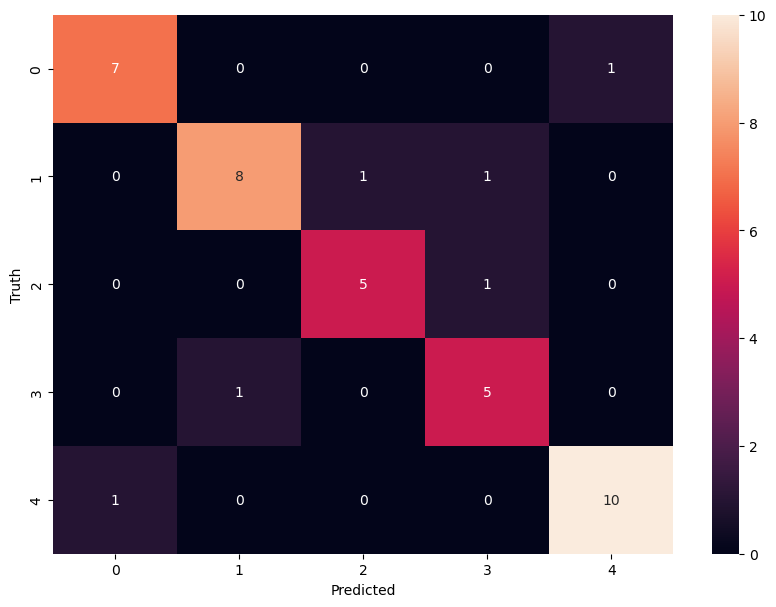

In [169]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
class_dict

{'roger_federer': 0,
 'maria_sharapova': 1,
 'virat_kohli': 2,
 'serena_williams': 3,
 'lionel_messi': 4}

In [171]:
#saving the model

!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/evillimiter-1.5.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


['saved_model.pkl']

In [172]:
'''
#saving class dictionary 

{'roger_federer': 0,
 'maria_sharapova': 1,
 'virat_kohli': 2,
 'serena_williams': 3,
 'lionel_messi': 4}

'''

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))